In [28]:
import tensorflow as tf
import numpy as np
import pandas
import matplotlib.pyplot as plt
import nibabel as nib

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
train_dataset_path = 'C:/Users/cbil/Downloads/Brats 2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [35]:
test_image_flair = nib.load(train_dataset_path + 'BraTS20_Training_001/' + 'BraTS20_Training_001_flair.nii').get_fdata()
test_image_t1 = nib.load(train_dataset_path + 'BraTS20_Training_001/' + 'BraTS20_Training_001_t1.nii').get_fdata()
test_image_t1ce = nib.load(train_dataset_path + 'BraTS20_Training_001/' + 'BraTS20_Training_001_t1ce.nii').get_fdata()
test_image_t2 = nib.load(train_dataset_path + 'BraTS20_Training_001/' + 'BraTS20_Training_001_flair.nii').get_fdata()

np.shape(test_image_flair)

(240, 240, 155)

In [36]:
flattened_data_flair = np.reshape(test_image_flair,(test_image_flair.shape[0], -1))
flattened_data_t1 = np.reshape(test_image_t1,(test_image_t1.shape[0], -1))
flattened_data_t1ce = np.reshape(test_image_t1ce,(test_image_t1ce.shape[0], -1))
flattened_data_t2 = np.reshape(test_image_t2,(test_image_t2.shape[0], -1))

np.shape(flattened_data_flair)

(240, 37200)

In [37]:
scaled_data_flair = scaler.fit_transform(flattened_data_flair)
scaled_data_t1 = scaler.fit_transform(flattened_data_t1)
scaled_data_t1ce = scaler.fit_transform(flattened_data_t1ce)
scaled_data_t2 = scaler.fit_transform(flattened_data_t2)

np.shape(scaled_data_flair)

(240, 37200)

In [38]:
scaled_data_flair = np.reshape(scaled_data_flair, np.shape(test_image_flair))
scaled_data_t1 = np.reshape(scaled_data_t1, np.shape(test_image_t1))
scaled_data_t1ce = np.reshape(scaled_data_t1ce, np.shape(test_image_t1ce))
scaled_data_t2 = np.reshape(scaled_data_t2, np.shape(test_image_t2))

print(np.shape(scaled_data_flair))
print(scaled_data_flair.max())

(240, 240, 155)
1.0


In [39]:
test_mask = nib.load(train_dataset_path + 'BraTS20_Training_001/' + 'BraTS20_Training_001_seg.nii').get_fdata()
print(np.unique(test_mask))

[0. 1. 2. 4.]


In [41]:
test_mask[test_mask == 4] = 3
print(np.unique(test_mask))

[0. 1. 2. 3.]


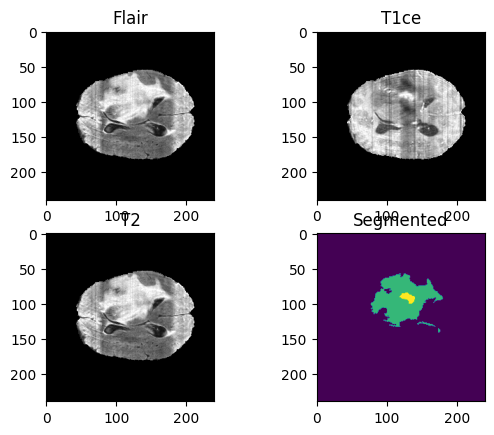

In [82]:
area = 80
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(scaled_data_flair[:,:,area], cmap = 'gray')
axs[0,1].imshow(scaled_data_t1ce[:,:,area], cmap = 'gray')
axs[1,0].imshow(scaled_data_t2[:,:,area], cmap = 'gray')
axs[1,1].imshow(test_mask[:,:,area],)

axs[0,0].set_title('Flair')
axs[0,1].set_title('T1ce')
axs[1,0].set_title('T2')
axs[1,1].set_title('Segmented')
plt.show()

In [104]:
combined_x = np.stack([scaled_data_flair, scaled_data_t1ce, scaled_data_t2], axis = 3)
np.shape(combined_x)

(240, 240, 155, 3)

In [105]:
combined_x = combined_x[56:184, 56:184, 13:141]

In [106]:
test_mask = test_mask[56:184, 56:184, 13:141]

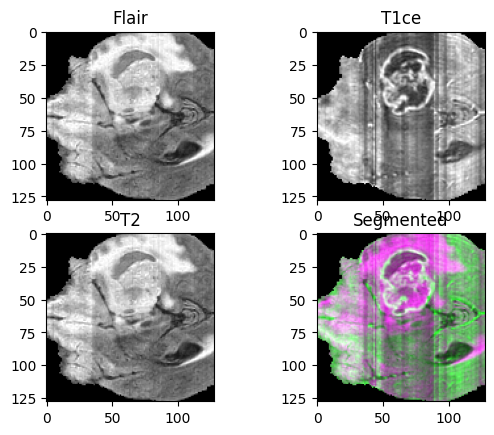

In [113]:
area = 50
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(combined_x[:,:,area,0], cmap = 'gray')
axs[0,1].imshow(combined_x[:,:,area,1], cmap = 'gray')
axs[1,0].imshow(combined_x[:,:,area,2], cmap = 'gray')
axs[1,1].imshow(combined_x[:,:,area],)

axs[0,0].set_title('Flair')
axs[0,1].set_title('T1ce')
axs[1,0].set_title('T2')
axs[1,1].set_title('Segmented')
plt.show()